# Henry Hub 천연가스가격예측

- Henry Hub 가스는 미국 루이지애나주의 **헨리 허브(Henry Hub)** 라는 가스 집결지를 기준으로 거래되는 천연가스의 기준 가격
- 실질적 미국 천연가스의 기준

상관계수가 유의미하게 높거나 낮으며, 시계열 패턴 유사도가 높고, 회귀계수가 유의미한 변수를 선택

In [1]:
import pandas as pd

In [2]:
# 훈련데이터 읽기
train_df = pd.read_csv('data_train.csv')
test_df = pd.read_csv('data_test.csv')

In [3]:
#한글폰트
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

# 한글 폰트 경로 설정
font_path = 'C:/Windows/Fonts/malgun.ttf'
font_name = fm.FontProperties(fname=font_path).get_name()
plt.rc('font', family=font_name)

# 상관관계 분석

c:\Users\82106\anaconda3\lib\site-packages\seaborn\utils.py:95: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.draw()
C:\Users\82106\AppData\Local\Temp\ipykernel_29532\2550786855.py:14: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  plt.tight_layout()
c:\Users\82106\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


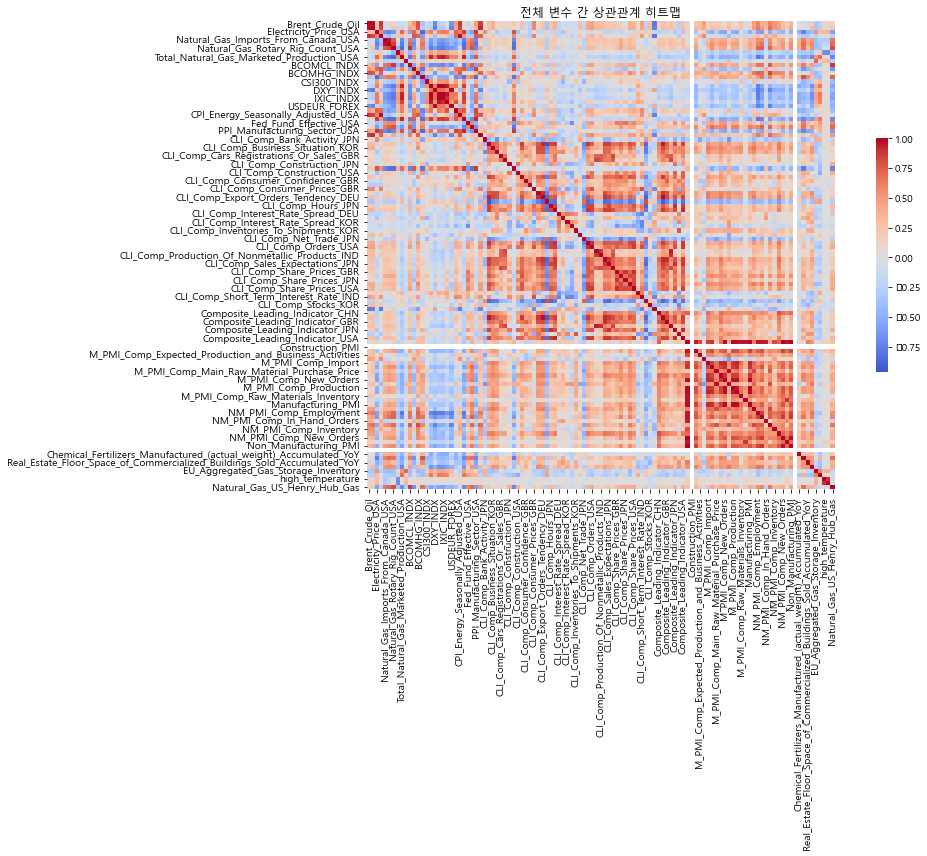

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

# 상관관계 계산
corr_matrix = train_df.drop(columns=['date']).corr()

# 예측 대상과의 상관관계만 추출
target_corr = corr_matrix['Natural_Gas_US_Henry_Hub_Gas'].sort_values(ascending=False)

# 상관관계 히트맵 시각화
plt.figure(figsize=(16, 12))
sns.heatmap(corr_matrix, cmap='coolwarm', center=0, square=True, cbar_kws={"shrink": .5})
plt.title('전체 변수 간 상관관계 히트맵')
plt.tight_layout()
plt.show()

- BCOMCL_INDX	:	블룸버그 원유 지수 (Crude Oil Index), 원유 가격 흐름 0.88

- Natural_Gas_Rotary_Rig_Count_USA	:	미국 내 천연가스 굴착기(리그) 가동 수 0.81

- Kilian_Global_Economy_Index_WORLD	:	세계 경기 상태를 나타내는 지수 (수요 측면 반영) 0.72

- BCOMNG_INDX	:	블룸버그 천연가스 지수 (Natural Gas Index) 0.72

- Natural_Gas_Imports_USA	:	미국 전체 천연가스 수입량 0.71

- Natural_Gas_Imports_From_Canada_USA	:	미국의 캐나다산 천연가스 수입량 0.66

- CPI_Index_Seasonally_Adjusted_USA	:	미국 소비자물가지수 (CPI), 계절 조정 -0.70

- PPI_Manufacturing_Sector_USA	:	미국 제조업 생산자물가지수 (PPI) -0.60

- GSPC_INDX	:S&P 500 지수 (미국 대형주 주가지수) -0.54

- DJI_INDX	:	다우존스 산업평균지수 -0.56

- IXIC_INDX	:	나스닥 종합지수 -0.59

- DXY_INDX	:	달러 인덱스 (주요 통화 대비 달러 강도) -0.43

In [5]:
target_corr.head(50)

Natural_Gas_US_Henry_Hub_Gas                                                1.000000
BCOMCL_INDX                                                                 0.876707
Natural_Gas_Rotary_Rig_Count_USA                                            0.813185
Kilian_Global_Economy_Index_WORLD                                           0.717521
BCOMNG_INDX                                                                 0.715830
Natural_Gas_Imports_USA                                                     0.710747
Crude_Steel_Accumulated_YoY                                                 0.672205
Natural_Gas_Imports_From_Canada_USA                                         0.663204
NM_PMI_Comp_Intermediate_Input_Price                                        0.649997
Fed_Fund_Effective_USA                                                      0.601312
NM_PMI_Comp_Expected_Business_Activities                                    0.586467
NM_PMI_Comp_Employment                                           

In [6]:
target_corr.tail(50)

CLI_Comp_Demand_Or_Orders_Inflow_Tendency_DEU       0.122992
CLI_Comp_Stocks_KOR                                 0.120102
CLI_Comp_Consumer_Confidence_DEU                    0.117196
CLI_Comp_Interest_Rate_Spread_JPN                   0.114386
CLI_Comp_Monetary_Aggregates_IND                    0.110830
CLI_Comp_Cars_Registrations_Or_Sales_GBR            0.105465
CLI_Comp_Short_Term_Interest_Rate_GBR               0.104368
Brent_Crude_Oil                                     0.098104
CLI_Comp_Business_Situation_KOR                     0.092449
BCOMHG_INDX                                         0.055113
CLI_Comp_Consumer_Confidence_GBR                    0.052278
CLI_Comp_Cars_Registrations_Or_Sales_IND            0.037481
low_temperature                                    -0.031041
Composite_Leading_Indicator_KOR                    -0.032514
M_PMI_Comp_Raw_Materials_Inventory                 -0.038798
high_temperature                                   -0.043108
CLI_Comp_Inventories_To_

In [7]:
import plotly.graph_objects as go
import pandas as pd

# 한글 변수명과 상관계수
variables_kor = [
    "원유 지수", "가스 굴착기 수", "세계경기 지수", "가스 지수", "가스 수입량",
    "철강 YoY", "캐나다 가스 수입량", "중간재 물가(PMI)", "기준금리", "제조업 경기예상(PMI)",
    "제조업 고용(PMI)", "광업 PPI", "비제조업 PMI", "재고 지수(PMI)", "수출 신규수주(PMI)",
    "주가 선행지수(미)", "주문지수(미)", "신규수주(제조)", "신규수주(비제조)",
    "순무역(JPN)", "완제품재고(DEU)", "지하저장량", "총소비량", "금속가격지수",
    "CSI300", "달러지수", "NYSE 지수", "달러-유로 환율", "S&P500",
    "다우존스", "전력가격", "나스닥", "제조업 PPI", "금속지수",
    "소비자물가지수", "생산량", "건설생산(중국)"
]

correlations = [
    0.876707, 0.813185, 0.717521, 0.715830, 0.710747,
    0.672205, 0.663204, 0.649997, 0.601312, 0.586467,
    0.546607, 0.505391, 0.452057, 0.438894, 0.435290,
    0.429639, 0.428100, 0.424588, 0.406870,
   -0.272475, -0.278416, -0.279016, -0.353409, -0.393553,
   -0.408610, -0.426271, -0.438696, -0.477372, -0.544617,
   -0.555771, -0.570210, -0.589268, -0.604050, -0.656326,
   -0.698486, -0.703500, -0.722618
]

# 데이터프레임 생성 및 정렬
df = pd.DataFrame({
    "변수": variables_kor,
    "상관계수": correlations
}).sort_values("상관계수", ascending=False)

# 긍정/부정 구분해 색 지정
df["색상"] = df["상관계수"].apply(lambda x: "steelblue" if x > 0 else "crimson")

# Plotly 막대차트
fig = go.Figure(go.Bar(
    x=df["변수"],
    y=df["상관계수"],
    marker_color=df["색상"],
    text=df["상관계수"].round(3),
    textposition="outside"
))

fig.update_layout(
    title="Henry Hub 가격과 변수 간 상관계수",
    xaxis_title="변수명",
    yaxis_title="상관계수",
    yaxis=dict(range=[-1, 1]),
    template="plotly_white",
    margin=dict(t=60, b=160)
)

fig.show()


# 피처 중요도

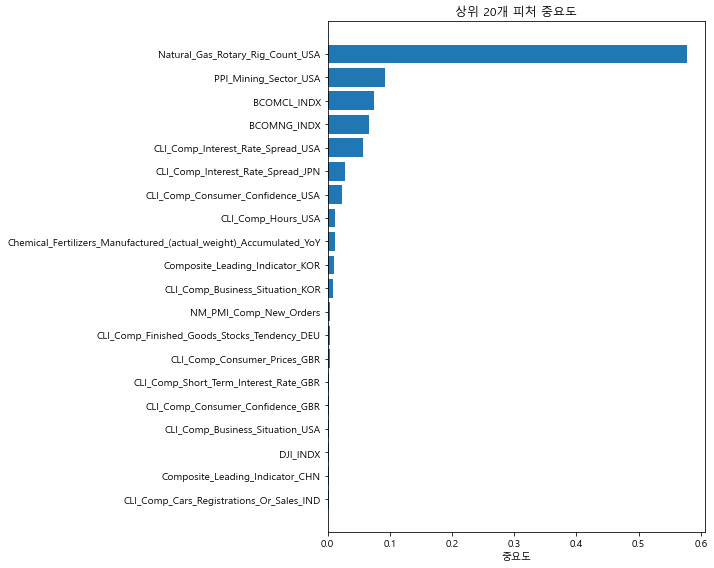

In [8]:
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# date와 target 제외한 feature 설정
X = train_df.drop(columns=['date', 'Natural_Gas_US_Henry_Hub_Gas'])
y = train_df['Natural_Gas_US_Henry_Hub_Gas']

# 학습/검증 데이터 분할
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=42)

# 모델 학습
model = XGBRegressor(random_state=42)
model.fit(X_train, y_train)

# 피처 중요도 시각화
importances = model.feature_importances_
features = X.columns
importance_df = pd.DataFrame({'Feature': features, 'Importance': importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# 시각화
plt.figure(figsize=(10, 8))
plt.barh(importance_df['Feature'][:20][::-1], importance_df['Importance'][:20][::-1])
plt.title('상위 20개 피처 중요도')
plt.xlabel('중요도')
plt.tight_layout()
plt.show()

- 천연가스 가격 결정에 가장 중요한 변수는 '공급 측면 변수'

- 특히 굴착기 수, 원유 가격, 생산자물가(PPI) 등이 예측과 인과 모두에서 핵심 역할

- 수요 지표나 금융지표(DXY, Kilian 지수 등)는 보조적 설명에 유효하지만, 모델에선 기여도 낮음

- 상관계수와 피처중요도가 모두 높은 변수들은 '설명력 + 예측력'이 둘 다 강한 핵심 변수로 간주 가능

# EDA

In [9]:
# 날짜 변환
train_df['date'] = pd.to_datetime(train_df['date'])
train_df = train_df.sort_values('date')

### 시계열 분석

- 천연가스 시계열과 인과관계가 높다고 추정되는는 변수들을 시계열 시각화를 통해 비교하여, 시계열 추이의 유사도를 분석한다.

- 양/음의 방향으로 시계열 패턴 유사도가 높을수록 인과관계가 높을 확률 상승

- 주요 판단 요소 : 2000년대 중/후반 2번은 가스 급등과 2010년대 부터의 가격 하락에 있어서 얼마나 유사한지 파악

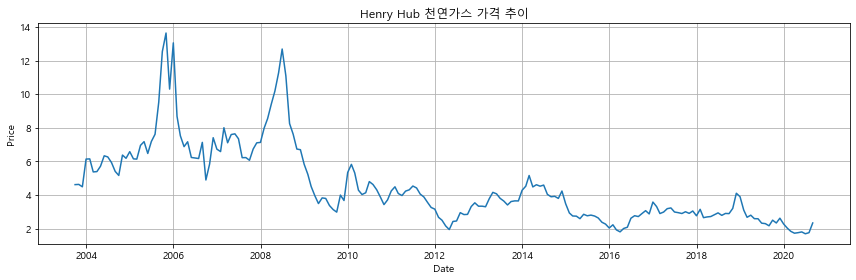

In [10]:
# 시계열 시각화
plt.figure(figsize=(12, 4))
plt.plot(train_df['date'], train_df['Natural_Gas_US_Henry_Hub_Gas'])
plt.title('Henry Hub 천연가스 가격 추이')
plt.xlabel('Date')
plt.ylabel('Price')
plt.grid()
plt.tight_layout()
plt.show()

In [ ]:
from sklearn.preprocessing import StandardScaler

# 타겟 정의
target = 'Natural_Gas_US_Henry_Hub_Gas'

# 스케일링 대상: 모든 컬럼 중에서 타겟 포함
scale_cols = list(train_df.columns)
if 'date' in scale_cols:
    scale_cols.remove('date')  # 날짜는 스케일링 대상 아님

# 스케일링
scaler = StandardScaler()
scaled_values = scaler.fit_transform(train_df[scale_cols])
scaled_df = pd.DataFrame(scaled_values, columns=scale_cols)
scaled_df['date'] = train_df['date'].values

# 한글 폰트 설정
sns.set_style("whitegrid")
font_path = 'C:/Windows/Fonts/malgun.ttf'
font_name = fm.FontProperties(fname=font_path).get_name()
plt.rc('font', family=font_name)
plt.rcParams['axes.unicode_minus'] = False

# 시각화
import math

features = [col for col in scale_cols if col != target]
n_features = len(features)
n_cols = 4
n_rows = math.ceil(n_features / n_cols)

# 페이지 단위로 나눠서 보기
for start in range(0, n_features, n_cols * 4):  # 4행씩 페이지 분할
    end = min(start + n_cols * 4, n_features)
    subset = features[start:end]
    
    fig, axes = plt.subplots(math.ceil(len(subset)/n_cols), n_cols, figsize=(20, 4 * math.ceil(len(subset)/n_cols)))
    axes = axes.flatten()

    for i, col in enumerate(subset):
        ax = axes[i]
        ax.plot(scaled_df['date'], scaled_df[col], label=col, color='steelblue')
        ax.plot(scaled_df['date'], scaled_df[target], label='Henry Hub 가격', color='darkred')
        ax.set_title(f'{col} vs Henry Hub 가격', fontsize=10)
        ax.set_xlabel('날짜', fontsize=8)
        ax.set_ylabel('표준화된 값', fontsize=8)
        ax.tick_params(axis='x', rotation=45, labelsize=7)
        ax.tick_params(axis='y', labelsize=7)
        ax.legend(fontsize=8)

    # 남은 subplot 숨기기
    for j in range(len(subset), len(axes)):
        fig.delaxes(axes[j])

    plt.tight_layout()
    plt.subplots_adjust(hspace=0.5, wspace=0.3)
    plt.show()

c:\Users\82106\anaconda3\lib\site-packages\sklearn\utils\extmath.py:1108: RuntimeWarning:

invalid value encountered in divide

c:\Users\82106\anaconda3\lib\site-packages\sklearn\utils\extmath.py:1113: RuntimeWarning:

invalid value encountered in divide

c:\Users\82106\anaconda3\lib\site-packages\sklearn\utils\extmath.py:1133: RuntimeWarning:

invalid value encountered in divide



AttributeError: 'list' object has no attribute 'head'

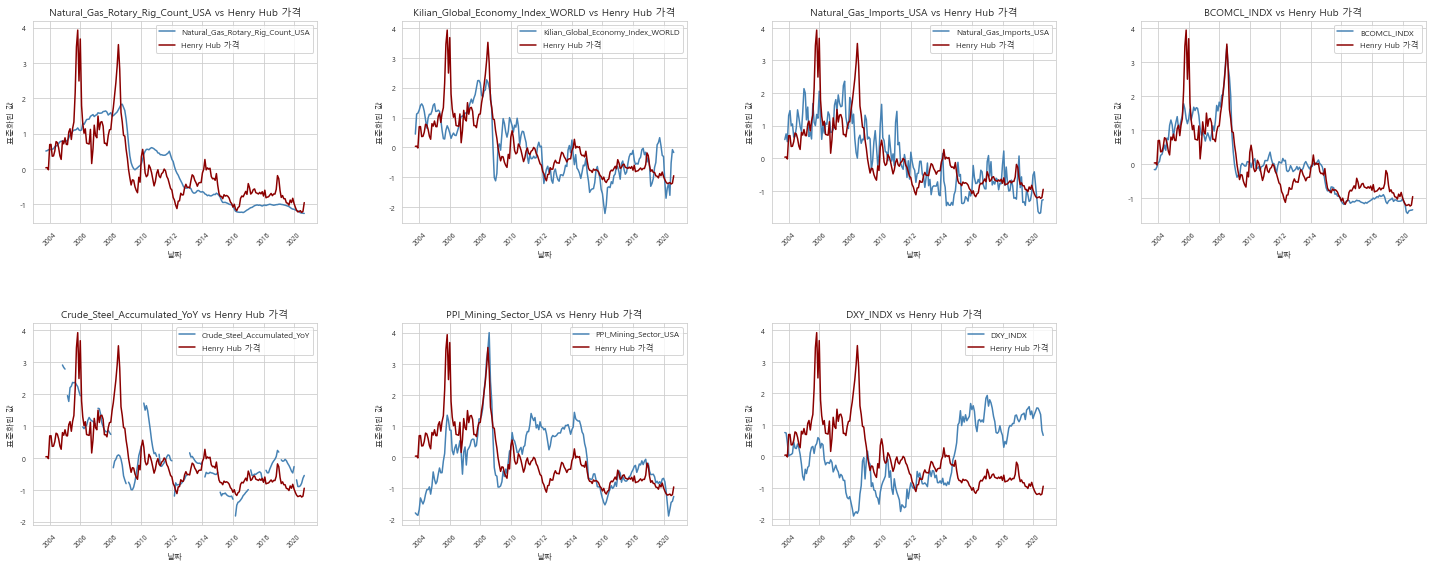

In [12]:
import math

col =['Natural_Gas_Rotary_Rig_Count_USA',
    'Kilian_Global_Economy_Index_WORLD', 
    'Natural_Gas_Imports_USA',
    'BCOMCL_INDX',
    'Crude_Steel_Accumulated_YoY',
    'PPI_Mining_Sector_USA',
    'DXY_INDX']

from sklearn.preprocessing import StandardScaler

# 타겟 정의
target = 'Natural_Gas_US_Henry_Hub_Gas'

# 스케일링 대상: col 리스트의 변수들과 타겟
scale_cols = col + [target]

# 스케일링
scaler = StandardScaler()
scaled_values = scaler.fit_transform(train_df[scale_cols])
scaled_df = pd.DataFrame(scaled_values, columns=scale_cols)
scaled_df['date'] = train_df['date'].values

# 한글 폰트 설정
sns.set_style("whitegrid")
font_path = 'C:/Windows/Fonts/malgun.ttf'
font_name = fm.FontProperties(fname=font_path).get_name()
plt.rc('font', family=font_name)
plt.rcParams['axes.unicode_minus'] = False

# 시각화
n_cols = 4
n_rows = math.ceil(len(col) / n_cols)

fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, 4 * n_rows))
axes = axes.flatten()

for i, feature in enumerate(col):
    ax = axes[i]
    ax.plot(scaled_df['date'], scaled_df[feature], label=feature, color='steelblue')
    ax.plot(scaled_df['date'], scaled_df[target], label='Henry Hub 가격', color='darkred')
    ax.set_title(f'{feature} vs Henry Hub 가격', fontsize=10)
    ax.set_xlabel('날짜', fontsize=8)
    ax.set_ylabel('표준화된 값', fontsize=8)
    ax.tick_params(axis='x', rotation=45, labelsize=7)
    ax.tick_params(axis='y', labelsize=7)
    ax.legend(fontsize=8)

# 남은 subplot 숨기기
for j in range(len(col), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.subplots_adjust(hspace=0.5, wspace=0.3)
plt.show()

상관관계의 절댓값이 유의미 할 정도로 크며, 시계열 패턴 유사도가 높은 변수는 *가스 굴착기수, 세계 경기지수, 원유 지수, 광업ppi, 철강, 가스 수입량, 달러지수* 이다.

가스 굴착기수 - 세계 경기지수, 원유 지수, 광업ppi - 철강 - 가스 수입량 순으로 유사한 시계열을 보이며,

역의 방향으로는 달러지수가 유사도를 보인다.

나머지 변수들은 시계열 패턴 유사도가 나타나지 않으므로 인과관계가 크지 않다고 판단하였다.

# 회귀분석

In [13]:
cols_eng = [
    'Natural_Gas_Rotary_Rig_Count_USA',
    'Kilian_Global_Economy_Index_WORLD',
    'Natural_Gas_Imports_USA',
    'BCOMCL_INDX',
    'Crude_Steel_Accumulated_YoY',
    'PPI_Mining_Sector_USA',
    'DXY_INDX'
]

cols_kor = [
    '가스 굴착기수',
    '세계경기지수',
    '가스 수입량',
    '원유 지수',
    '철강 YoY',
    '광업 PPI',
    '달러지수'
]

import statsmodels.api as sm

target = 'Natural_Gas_US_Henry_Hub_Gas'
print("단변량 회귀분석 결과:\n")

for eng_col, kor_col in zip(cols_eng, cols_kor):
    X = train_df[[eng_col]].dropna()
    y = train_df.loc[X.index, target]

    X_const = sm.add_constant(X)
    model = sm.OLS(y, X_const).fit()
    
    coef = model.params[1]
    pval = model.pvalues[1]

    print(f"{kor_col:<20} 회귀계수: {coef:>8.4f} | p-value: {pval:>6.4f}")

단변량 회귀분석 결과:

가스 굴착기수              회귀계수:   0.0038 | p-value: 0.0000
세계경기지수               회귀계수:   0.0212 | p-value: 0.0000
가스 수입량               회귀계수:   0.0000 | p-value: 0.0000
원유 지수                회귀계수:   0.0128 | p-value: 0.0000
철강 YoY               회귀계수:   0.1719 | p-value: 0.0000
광업 PPI               회귀계수:   0.0283 | p-value: 0.0000
달러지수                 회귀계수:  -0.1243 | p-value: 0.0000


가스 수입량은 회귀계수와 시계열 패턴 유사도에서 인과관계가 유의미하지 않다고 판단하여 제외

# 산점도 분포

In [14]:
cols_eng = [
    'Natural_Gas_Rotary_Rig_Count_USA',
    'Kilian_Global_Economy_Index_WORLD',
    'BCOMCL_INDX',
    'Crude_Steel_Accumulated_YoY',
    'PPI_Mining_Sector_USA',
    'DXY_INDX'
]

cols_kor = [
    '가스 굴착기수',
    '세계경기지수',
    '원유 지수',
    '철강 YoY',
    '광업 PPI',
    '달러지수'
]

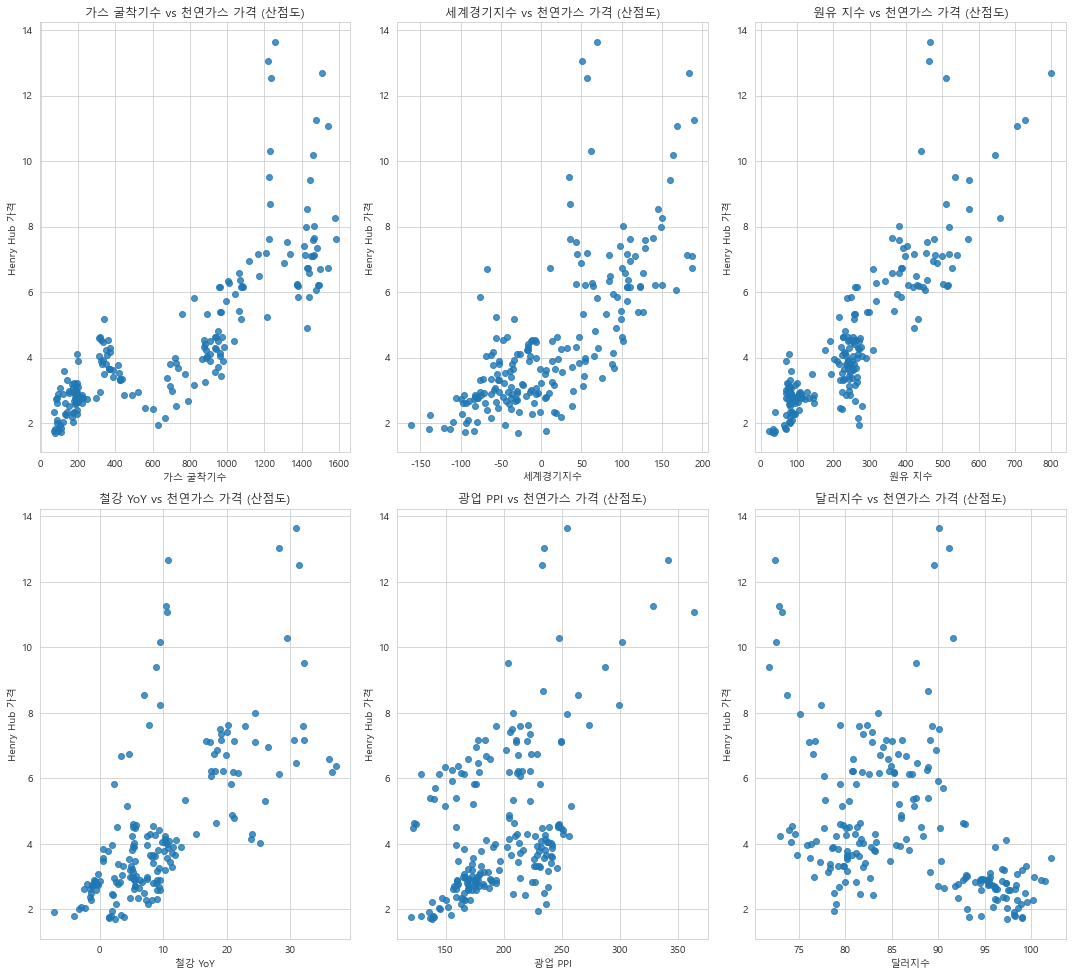

In [15]:
plt.rc('font', family=font_name)
plt.rcParams['axes.unicode_minus'] = False

# 3x2 형식의 서브플롯 배치
fig, axes = plt.subplots(len(cols_eng)//2 + len(cols_eng)%2, 3, figsize=(15, 20))
axes = axes.flatten()

for i, (eng_col, kor_col) in enumerate(zip(cols_eng, cols_kor)):
    ax = axes[i]
    # fit_reg=False 매개변수를 추가하여 회귀선 제거
    sns.regplot(data=train_df, x=eng_col, y=target, ax=ax, fit_reg=False)
    ax.set_title(f'{kor_col} vs 천연가스 가격 (산점도)')
    ax.set_xlabel(kor_col)
    ax.set_ylabel('Henry Hub 가격')

# 남은 빈 서브플롯 제거
for i in range(len(cols_eng), len(axes)):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()

1. 가스 굴착기수
- → 우상향 곡선형
- → 리그 수가 약 800대까지 증가할 때 천연가스 가격이 빠르게 상승, 이후 상승률은 완만해짐

2. 세계경기지수
- → 완만한 우상향
- → 지수 50 이상에서 가격이 6~10달러 범위에 분포, 다소 산포가 큼

3. 원유 지수
- → 거의 완전한 선형 우상향
- → 고점·저점이 천연가스 가격과 시기적으로 일치, 명확한 정비례 관계

4. 철강 YoY
- → 두 영역 집중
- → 0% 근처에서는 가격이 낮고, 10% 이상일 때 가격이 6달러 이상으로 상승

5. 광업 PPI
- → 넓은 범위의 우상향
- → 생산자물가 상승과 함께 천연가스 가격도 점진적으로 상승

6. 달러지수
- → 명확한 역(음의) 선형
- → 달러지수가 80 → 100으로 상승하는 구간에서 천연가스 가격은 10 → 3달러로 하락하는 패턴

# 결론

| 변수 | 시계열 유사도 | 회귀계수 | 상관계수 | 산점도 특징 | 인과관계 |
|----------------|-----------------------------|------------|------------|-----------------------------|-------------------------------|
| 가스 굴착기수 | 매우 유사 (패턴 일치) | +0.0038 | 0.8132 | 우상향·곡선형 — 리그 수가 800대까지 늘 때 가격이 가파르게 상승, 이후 완만 | 가스 굴착기수 증가 → 가격 상승<br>굴착·시추 활동 확대 → 미래 공급 기대 + 수요 심리 동반 |
| 세계경기지수 | 다소 유사 (리드함) | +0.0212 | 0.7175 | 완만한 우상향·산포 큼. 지수 > 50일 때 가격도 6~10달러대 | 세계경기지수 개선 → 가격 상승<br>경기 회복 → 산업·발전용 가스 수요 확대 |
| 원유 지수 | 강한 유사도 (거의 일치) | +0.0128 | 0.8767 | 거의 선형적 우상향. 고점·저점 시점 일치 | 원유 지수 상승 → 가격 상승<br>유가 상승 시 대체재인 가스 가격도 함께 상승 |
| 철강 YoY | 시기별 유사 (중기 흐름 유사) | +0.1719 | 0.6722 | 0% 부근 집중 / 10% 이상일 때 가격 6달러 이상 | 철강 생산 증가 → 가격 상승<br>산업 생산 증가 → 공정용 에너지 수요 증가 |
| 광업 PPI | 유사 (가격 구조와 동행) | +0.0283 | 0.5054 | 우상향. 생산비 상승이 가격에 전이됨 | 광업 PPI 상승 → 가격 상승<br>채굴·운송 비용 상승이 가스 가격에 전가 |
| 달러지수 | 역방향 유사 | -0.1243 | -0.6980 | 역(음의) 선형 경향 — 달러 80→100 구간에서 가격 10→3달러로 하락 | 달러 강세 → 가격 하락<br>달러가치↑ → 달러표시 원자재 가격↓ (환율 효과) |